In [19]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("/kaggle/input/sales-dataset/sales_data.csv")


In [61]:
df.head(8)

,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep
0,1052,2023-02-03,Bob,North,5053.97,18,Furniture,152.75,267.22,Returning,0.09,Cash,Online,North-Bob
1,1093,2023-04-21,Bob,West,4384.02,17,Furniture,3816.39,4209.44,Returning,0.11,Cash,Retail,West-Bob
2,1015,2023-09-21,David,South,4631.23,30,Food,261.56,371.40,Returning,0.20,Bank Transfer,Retail,South-David
3,1072,2023-08-24,Bob,South,2167.94,39,Clothing,4330.03,4467.75,New,0.02,Credit Card,Retail,South-Bob
4,1061,2023-03-24,Charlie,East,3750.20,13,Electronics,637.37,692.71,New,0.08,Credit Card,Online,East-Charlie
5,1021,2023-02-11,Charlie,West,3761.15,32,Food,900.79,1106.51,New,0.21,Cash,Online,West-Charlie
6,1083,2023-04-11,Bob,West,618.31,29,Furniture,2408.81,2624.09,Returning,0.14,Cash,Online,West-Bob
7,1087,2023-01-06,Eve,South,7698.92,46,Furniture,3702.51,3964.65,New,0.12,Bank Transfer,Online,South-Eve


In [21]:
df.describe()

,Product_ID,Sales_Amount,Quantity_Sold,Unit_Cost,Unit_Price,Discount
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,1050.128000,5019.265230,25.355000,2475.304550,2728.440120,0.15239
std,29.573505,2846.790126,14.159006,1417.872546,1419.399839,0.08720
min,1001.000000,100.120000,1.000000,60.280000,167.120000,0.00000
25%,1024.000000,2550.297500,13.000000,1238.380000,1509.085000,0.08000
50%,1051.000000,5019.300000,25.000000,2467.235000,2696.400000,0.15000
75%,1075.000000,7507.445000,38.000000,3702.865000,3957.970000,0.23000
max,1100.000000,9989.040000,49.000000,4995.300000,5442.150000,0.30000


In [22]:
df.shape

(1000, 14)

In [23]:
df.dtypes

Product_ID                int64
Sale_Date                object
Sales_Rep                object
Region                   object
Sales_Amount            float64
Quantity_Sold             int64
Product_Category         object
Unit_Cost               float64
Unit_Price              float64
Customer_Type            object
Discount                float64
Payment_Method           object
Sales_Channel            object
Region_and_Sales_Rep     object
dtype: object

In [24]:
df.isnull().sum()

Product_ID              0
Sale_Date               0
Sales_Rep               0
Region                  0
Sales_Amount            0
Quantity_Sold           0
Product_Category        0
Unit_Cost               0
Unit_Price              0
Customer_Type           0
Discount                0
Payment_Method          0
Sales_Channel           0
Region_and_Sales_Rep    0
dtype: int64

In [25]:
df.dropna

<bound method DataFrame.dropna of      Product_ID   Sale_Date Sales_Rep Region  Sales_Amount  Quantity_Sold  \
0          1052  2023-02-03       Bob  North       5053.97             18   
1          1093  2023-04-21       Bob   West       4384.02             17   
2          1015  2023-09-21     David  South       4631.23             30   
3          1072  2023-08-24       Bob  South       2167.94             39   
4          1061  2023-03-24   Charlie   East       3750.20             13   
..          ...         ...       ...    ...           ...            ...   
995        1010  2023-04-15   Charlie  North       4733.88              4   
996        1067  2023-09-07       Bob  North       4716.36             37   
997        1018  2023-04-27     David  South       7629.70             17   
998        1100  2023-12-20     David   West       1629.47             39   
999        1086  2023-08-16     Alice   East       4923.93             48   

    Product_Category  Unit_Cost  Unit_Pri

In [26]:
df.fillna(df.mean(numeric_only=True), inplace=True)
df.fillna(df.mode().iloc[0], inplace=True)  # For categorical data


In [27]:
df.head

<bound method NDFrame.head of      Product_ID   Sale_Date Sales_Rep Region  Sales_Amount  Quantity_Sold  \
0          1052  2023-02-03       Bob  North       5053.97             18   
1          1093  2023-04-21       Bob   West       4384.02             17   
2          1015  2023-09-21     David  South       4631.23             30   
3          1072  2023-08-24       Bob  South       2167.94             39   
4          1061  2023-03-24   Charlie   East       3750.20             13   
..          ...         ...       ...    ...           ...            ...   
995        1010  2023-04-15   Charlie  North       4733.88              4   
996        1067  2023-09-07       Bob  North       4716.36             37   
997        1018  2023-04-27     David  South       7629.70             17   
998        1100  2023-12-20     David   West       1629.47             39   
999        1086  2023-08-16     Alice   East       4923.93             48   

    Product_Category  Unit_Cost  Unit_Price C

In [28]:
df.dtypes


Product_ID                int64
Sale_Date                object
Sales_Rep                object
Region                   object
Sales_Amount            float64
Quantity_Sold             int64
Product_Category         object
Unit_Cost               float64
Unit_Price              float64
Customer_Type            object
Discount                float64
Payment_Method           object
Sales_Channel            object
Region_and_Sales_Rep     object
dtype: object

In [29]:
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()
print(numeric_columns)


['Product_ID', 'Sales_Amount', 'Quantity_Sold', 'Unit_Cost', 'Unit_Price', 'Discount']


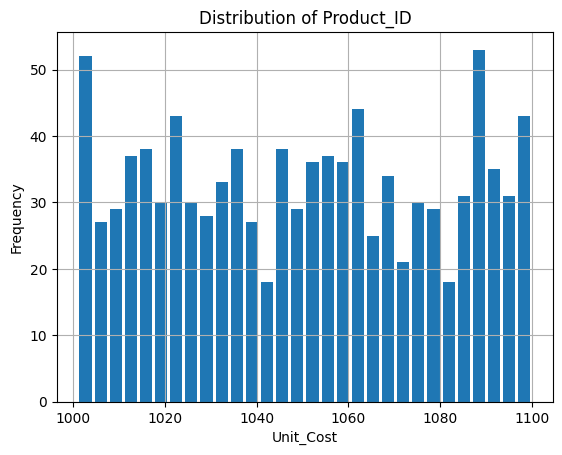

In [56]:

df[numeric_columns[0]].hist(bins=30 ,rwidth = 0.8 )
plt.xlabel(numeric_columns[3])
plt.ylabel('Frequency')
plt.title(f'Distribution of {numeric_columns[0]}')
plt.show()


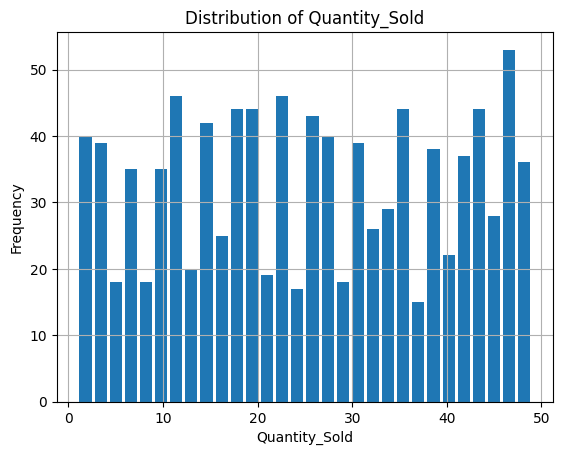

In [55]:

df[numeric_columns[2]].hist(bins=30 ,rwidth = 0.8 )
plt.xlabel(numeric_columns[2])
plt.ylabel('Frequency')
plt.title(f'Distribution of {numeric_columns[2]}')
plt.show()


In [49]:
category_columns = df.select_dtypes(include=['object']).columns.tolist()
print( category_column) 

['Sale_Date', 'Sales_Rep', 'Region', 'Product_Category', 'Customer_Type', 'Payment_Method', 'Sales_Channel', 'Region_and_Sales_Rep']


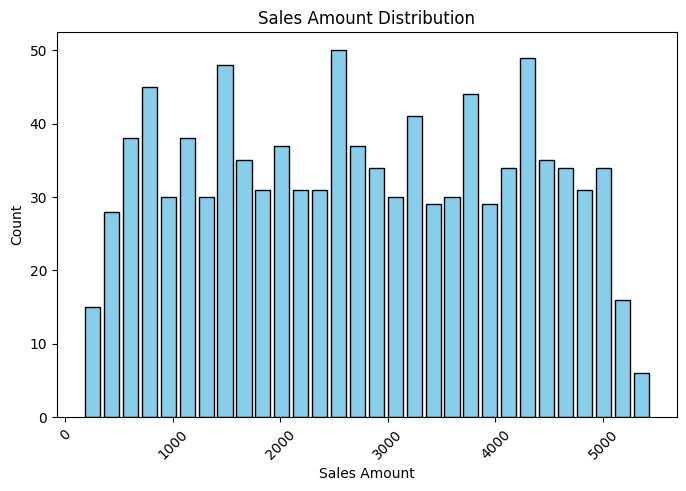

In [59]:
import matplotlib.pyplot as plt

# Plot histogram with proper binning
plt.figure(figsize=(8, 5))
plt.hist(df[numeric_columns[4]], bins=30, color='skyblue', edgecolor='black', rwidth=0.8)  

plt.xlabel("Sales Amount")
plt.ylabel("Count")
plt.title("Sales Amount Distribution")
plt.xticks(rotation=45)
plt.show()


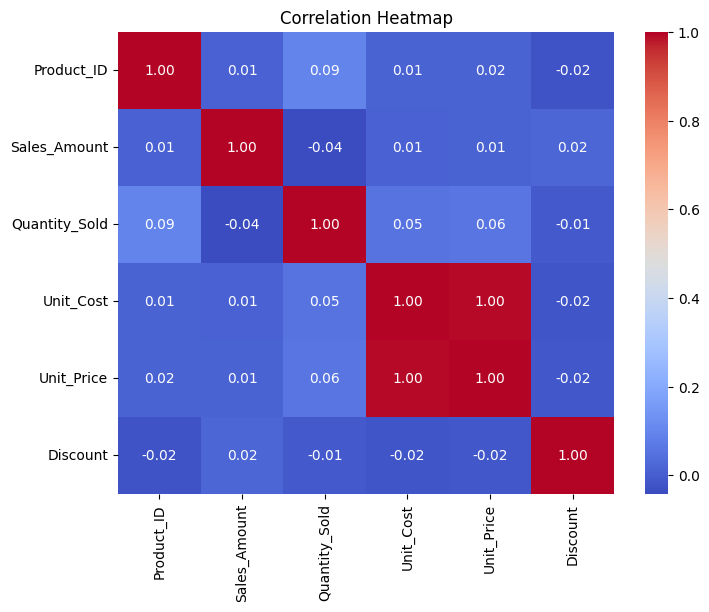

In [33]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


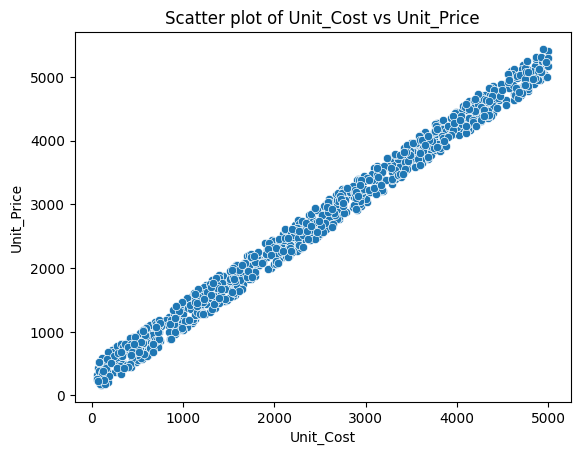

In [35]:

x_col = numeric_columns[3]  
y_col = numeric_columns[4]  

# Scatter plot
sns.scatterplot(x=x_col, y=y_col, data=df)
plt.title(f"Scatter plot of {x_col} vs {y_col}")
plt.show()


<Axes: xlabel='Region', ylabel='Sales_Amount'>

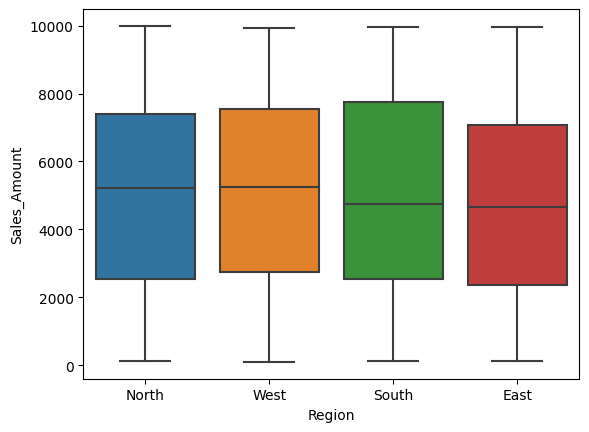

In [37]:
sns.boxplot(x=category_column[2], y=numeric_columns[1], data=df)


<Axes: xlabel='Sales_Rep', ylabel='Sales_Amount'>

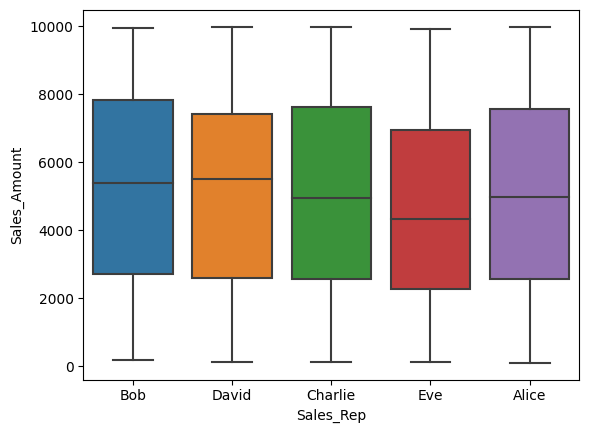

In [38]:
sns.boxplot(x=category_column[1], y=numeric_columns[1], data=df)


<Axes: xlabel='Customer_Type', ylabel='Quantity_Sold'>

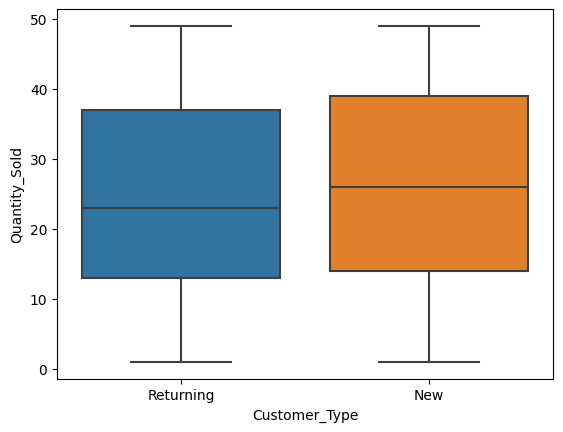

In [39]:
sns.boxplot(x=category_column[4], y=numeric_columns[2], data=df)


<Axes: xlabel='Region', ylabel='Sales_Amount'>

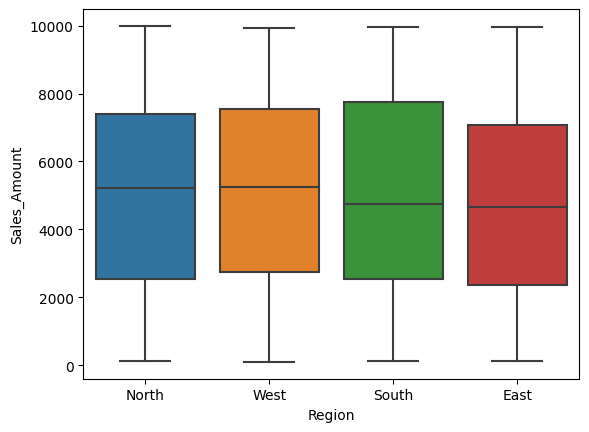

In [40]:
sns.boxplot(x=category_column[2], y=numeric_columns[1], data=df)


In [41]:
df.groupby(category_column[2])[numeric_columns[1]].mean()


Region
East     4790.087186
North    5129.634869
South    5107.304690
West     5063.971025
Name: Sales_Amount, dtype: float64

In [42]:
df.groupby(category_column[3])[numeric_columns[1]].mean()


Product_Category
Clothing       4901.023731
Electronics    5054.876585
Food           5317.582035
Furniture      4848.144962
Name: Sales_Amount, dtype: float64

In [43]:
df.groupby(category_column[1])[numeric_columns[1]].mean()


Sales_Rep
Alice      5028.863385
Bob        5197.070337
Charlie    5093.559053
David      5142.961081
Eve        4642.028660
Name: Sales_Amount, dtype: float64